In [2]:
import numpy as np
import numpy 
import scipy.linalg as scplinalg
import numpy.linalg as LA
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
from sympy.plotting.plot import Plot, ContourSeries

In [3]:
x, y = sym.symbols("x y")

In [4]:
nPoints = 30 # Number of points
np.random.seed(4) # Setting a seed for reproducibility
Zx = np.random.uniform(-100,100, nPoints) # Generating the points x-values
Zy = np.random.uniform(-100, 100, nPoints) # Generating the points y-vales

In [5]:
def xtoAandCorB(X): 
    """
    Converting a ellipsiode expressed as a to Sac form
    
    Input:
    X - nx1 (n>= 5)
    
    Output:
    A: Matrix representing ellipsiode axis
    c: Vector representing center of ellipsiode
    """
    X = np.array(X)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    A1 = np.array([[X1,X2],[X2, X3]])
    vec = np.array([X4,X5]).reshape(2,1)
    return A1, vec

In [6]:
def AandCtoX(A1, c1):
    X1 = A1.item(0,0)
    X2 = A1.item(1,0)
    X3 = A1.item(1,1)
    X4 = c1.item(0,0)
    X5 = c1.item(1,0)
    return np.array([X1, X2, X3, X4, X5]).reshape(5,1)

In [7]:
def f1Xtof2X(X):
    """
    Convert ellipsiode expressed as f1 form to f2. With gamma 1. 
    """
    A1, c1 = xtoAandCorB(X)
    b1 = 2 * A1@c1
    gam = 1 - c1.T@A@c1

    X1 = A.item(0,0)
    X2 = A.item(1,0)
    X3 = A.item(1,1)
    X4 = b.item(0,0)
    X5 = b.item(1,0)
    return np.array([X1, X2, X3, X4, X5]).reshape(5,1), gam[0][0]
        

### Generating ellipses

In [8]:
def generateEllipseComponents(rmax = 70., rmin = 90, centermin = 0, centermax = 4):
    """
    Generating a random ellipsiode on the form of Sac
    
    Input:
    rmax: maxmium axis length
    rmin: minimum axis length
    centermin: minimum x and y position of center
    centermax: maximum x and y position of center
    
    Output: 
    A := Random positive definite 2x2 np.array with eigen values between 1 and 10
    c := Random 1x2 np.array with values in the range (-50, 50)
    
    """
    np.random.seed(4)
    Lambda = np.diag(np.random.uniform(1/rmax**2,1/rmin**2,2))
    P = np.array([])
    while P.size == 0:
        P = np.random.uniform(-100,100,4).reshape(2,2)
        P = scplinalg.orth(P)
    A = P @ Lambda @ P.T
    c = np.random.uniform(centermin,centermax,2).reshape(2,1)
    return (A, c)
    

In [9]:
A, c = generateEllipseComponents() # Generating main ellipsis which will be used
b = 2.*A@c #Converting said ellipse to Eab form gamma 
gamma = 1 - c.T @ A @ c #Converting said ellipse to Eab form gamma

In [10]:
X = sym.Matrix([x, y])
Sf = (X - c).T @ A @ (X - c) # Expressing the ellipsis with symbolic python
Ef = X.T @ A @ X - X.T @ b - gamma  # Expressing the ellipsis with symbolic python

# Generating test data

### Classifiying points

In [11]:
def classifiy(Zx, Zy, f, lim): 
    """
    Classifies the points
    
    Input: 
    Zx: List of x-coordinates (1xn)
    Zy: List of y-coordinates (1xn)
    f: Classfier function
    
    Output:
    Classes: If ith vector definied by Zx and Zy has f-value less than 0 class is 0, else class is 1. 
    """
    
    classes = []
    for i in range(len(Zx)):
        if f.subs({x: Zx[i], y: Zy[i]})[0] < lim:
            classes.append(1)
        else:
            classes.append(0)
    return classes

In [12]:
def seperate(Zx, Zy, classes):
    """
    Splits Zx and Zy by classes
    
    Input: 
    Zx: List of x-coordinates (1xn)
    Zy: List of y-coordinates (1xn)
    classes: List of 1 and 0
    
    Output:
    Za: 2xm, contains all points that have class 1
    Zb: 2x(n-m), contains all points that havel class 0
    """
    
    
    Z1 = [[],[]]
    Z2 = [[],[]]
    for i in range(len(Zx)):
        if classes[i] == 1:
            Z1[0].append(Zx[i])
            Z1[1].append(Zy[i])
        else:
            Z2[0].append(Zx[i])
            Z2[1].append(Zy[i])
    return np.array(Z1), np.array(Z2)

## Adding noise

In [13]:
def addNoise(Zx, Zy, noiseSize = 5):
        """
        Zx: List of x-coordinates (1xn)
        Zy: List of y-coordinates (1xn)
        noiseSize: Maximum size of noise
        
        """
        noiseX = np.random.normal(0,noiseSize,len(Zx))
        noiseY = np.random.normal(0,noiseSize,len(Zy))
        return Zx + noiseX, Zy + noiseY
        

In [14]:
isInEllipse = classifiy(Zx, Zy, Ef, 0) # Generating classes for test data

In [15]:
ZxNoise, ZyNoise = addNoise(Zx,Zy) # Adding noise to test data

In [16]:
Za, Zb  = seperate(ZxNoise, ZyNoise, isInEllipse) # Separting test data

# Plotting ellipses

In [17]:

def plot_scatter(X, Y, classes, xlim = 100, ylim = 100):
    """
    Generate scatter plot of point by class
   
    Input:
    X - X coordinates
    Y - Y coordinates
    Classes - class of point
    """
    
    plt.scatter(X, Y, c=classes)
    plt.xlim(-xlim,xlim)
    plt.ylim(-ylim,ylim)

In [18]:
def plot_ellipse1(A1, c1, xlim=100, ylim=100, resolution = 100, c = 'purple'):
    """
    Creates a countour level plot of ellipse on the form of Sac
    
    """
    
    X = sym.Matrix([x, y])
    ellipse = (X - c1).T @ A1 @ (X - c1)
    f = sym.lambdify((x, y), ellipse[0], 'numpy')
    xp = np.linspace(-xlim,xlim, resolution)
    yp = np.linspace(-ylim,ylim, resolution)
    xmesh, ymesh = numpy.meshgrid(xp, yp)
    plt.contour(xmesh, ymesh, f(xmesh, ymesh), [1], colors = [c])
    

In [19]:
GAM = 1
def plot_ellipse2(A1, b1, gam=GAM, xlim=100, ylim=100, resolution = 100, c = 'purple'):
    """
    Creates a countour level plot of ellipse on the form of Sac
    
    Note: if gam is wrong plot goes bad
    
    """
    
    X = sym.Matrix([x, y])
    ellipse = X.T @ A1 @ X - X.T @ b1 - sym.Matrix([[gam]]) # Set gamma to 
    f = sym.lambdify((x, y), ellipse[0], 'numpy')
    xp = np.linspace(-xlim,xlim, resolution)
    yp = np.linspace(-ylim,ylim, resolution)
    xmesh, ymesh = numpy.meshgrid(xp, yp)
    plt.contour(xmesh, ymesh, f(xmesh, ymesh), [0], colors = [c])
    

## Plotting test data f1

Text(0.5,1,'Test data ellipsiode without noise')

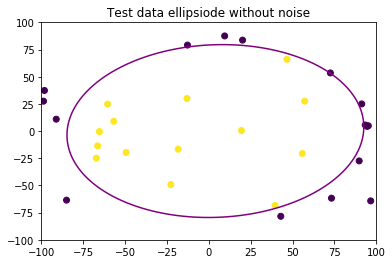

In [20]:
plot_ellipse1(A, c)
plot_scatter(Zx, Zy, isInEllipse)
plt.title("Test data ellipsiode without noise")

Text(0.5,1,'Test data ellipsiode with noise')

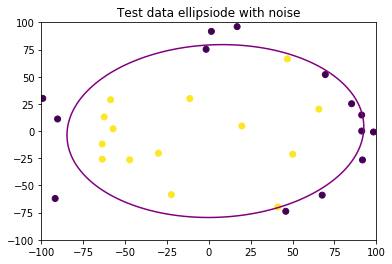

In [21]:
plot_ellipse1(A, c)
plot_scatter(ZxNoise, ZyNoise, isInEllipse)
plt.title("Test data ellipsiode with noise")

## Plotting test data f2

Text(0.5,1,'Test data ellipsiode without noise')

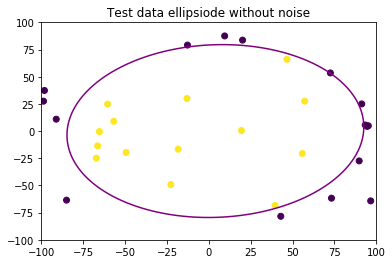

In [22]:
Xb = AandCtoX(A,c)
Xb, GAM = f1Xtof2X(Xb)
Ab, bb = xtoAandCorB(Xb)
plot_ellipse2(Ab, bb, GAM, xlim=100, ylim=100, resolution = 100)
plot_scatter(Zx, Zy, isInEllipse)
plt.title("Test data ellipsiode without noise")

Text(0.5,1,'Test data ellipsiode without noise')

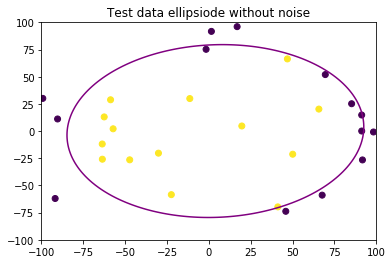

In [23]:
Xb = AandCtoX(A,c)
Xb, GAM = f1Xtof2X(Xb)
Ab, bb = xtoAandCorB(Xb)
plot_ellipse2(Ab, bb, GAM, xlim=100, ylim=100, resolution = 100)
plot_scatter(ZxNoise, ZyNoise, isInEllipse)
plt.title("Test data ellipsiode without noise")

# Defining residual functions

In [24]:
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, lam1, lam2, lam3, lam4, lam5, mu, gamma1, gamma2 = sym.symbols("x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 lam1 lam2 lam3 lam4 lam5 mu gamma1 gamma2") #Symbols to be used
z1, z2 = sym.symbols("z1 z2")

In [25]:
Asym = sym.Matrix([[x1, x2],[x2,x3]]) #
Zsym = sym.Matrix([z1, z2])
Csym = sym.Matrix([x4, x5])
Bsym = sym.Matrix([x4, x5])

In [26]:
Ri = (Zsym-Csym).T * Asym * (Zsym-Csym) - np.array([[1]])

In [27]:
RiWave = Zsym.T @ Asym @ Zsym - Zsym.T @ Bsym - sym.Matrix([[gamma1]])

In [28]:
gradRi = Ri.jacobian([x1, x2, x3, x4, x5])
gradRiWave = RiWave.jacobian([x1, x2, x3, x4, x5])

In [29]:
def f1(X, Za, Zb):
    X = np.array(X)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    
    res = 0
    for i in range(len(Za[0])):
        res += (np.maximum(Ri.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5})[0],0))**2

    for i in range(len(Zb[0])):
        res += (np.minimum(Ri.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5})[0],0))**2

    return res

In [30]:
def f2(X, Za, Zb, gam = GAM):
    X = np.array(X)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    
    res = 0
    for i in range(len(Za[0])):
        res += (np.maximum(RiWave.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5, gamma1: GAM})[0],0))**2

    for i in range(len(Zb[0])):
        res += (np.minimum(RiWave.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5, gamma1: GAM})[0],0))**2

    return res

In [31]:
def gradf1(X, Za, Zb):
    X = np.array(X)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    res = np.array([[0,0,0,0,0]])
    for i in range(len(Za[0])):
        res += 2*np.maximum(Ri.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5})[0],0)*gradRi.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5})
    
    for i in range(len(Zb[0])):
        res += 2*np.minimum(Ri.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5})[0],0)*gradRi.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5})
    return res.T    

In [32]:
def gradf2(X, Za, Zb, gam = GAM):
    X = np.array(X)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    res = np.array([[0,0,0,0,0]])
    for i in range(len(Za[0])):
        res += 2*np.maximum(RiWave.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5, gamma1: GAM})[0],0)*gradRiWave.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5, gamma1: GAM})

    
    for i in range(len(Zb[0])):
        res += 2*np.minimum(RiWave.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5, gamma1: GAM})[0],0)*gradRiWave.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3, x4: X4, x5: X5, gamma1: GAM})

    return res.T    

### Backtracking

In [33]:
x0a = np.array([1e-4,0,1e-4,1,2]).reshape(5,1)
p0a = -gradf1(x0a, Za, Zb)

In [34]:
x0b = np.array([1e-4,0,1e-4,1,2]).reshape(5,1)
x0b, GAM = f1Xtof2X(x0a)
p0b = -gradf2(x0b, Za, Zb)

In [35]:
alfaInit = 1e-8 # inital alfas of linesearch
contractionFactor = 0.5 # Used in backtracking
c1 = 1e-4 # c1 constant in linesearch
c2 = 0.1 # constant in linesearch
gradTol = 0.01 # gradient stopping condition stops if under
funcTol = 0.01


In [36]:
def columnNorm(column):
    """
    Description:
    Help function used to calculate 2-norm of column vector
    """
    res = 0 
    for i in range(len(column)):
        res += column[i]**2
    return res**(1/2)

In [37]:
def armijoBacktracking(xk, pk, fun, gradFun):
    """
    Description:
    Armijo backtracking algorithim.
    xk - initial point
    pk - search direction
    fun - function 
    gradFun - gradient of said function
    
    Output:
    al - steplength
    
    """
    
    al = alfaInit
    #print(xk+al*pk)
    #print(gradFun(xk+al*pk, Za, Zb).T)
    while not c1*al*(gradFun(xk+al*pk, Za, Zb).T * pk)[0] >= (gradFun(xk + al*pk, Za, Zb).T*pk)[0]:
        print(al)
        al = al * contractionFactor
        # Stopping in case condition never met
        if al < 1e-20:
            return 0  
    return al

## Gradient descent

In [38]:
def gradientDescent(xk, pk, fun, gradFun, niter, pnts):
    """
    Gradient descent algorithm
    xk - inital point
    pk - search direction
    fun - function 
    gradFun - gradient of said function
    
    output:
    pnts - all search points iterated thrugh
    
    """
    print("Starting iteration of grad descent,", niter)
    print("Starting value of function", fun(xk, Za, Zb))
    
    pnts.append(xk)
    al = armijoBacktracking(xk,pk,fun,gradFun)
    print("Al found is:", al)
    xnext = xk - al*gradFun(xk, Za, Zb)
    
    print("Norm of gradient", columnNorm(pk))
    if columnNorm(pk) < gradTol:
        return pnts
    
    if niter < 50:
        return gradientDescent(xnext, -gradFun(xnext, Za, Zb), fun, gradFun, niter+1, pnts)
    print("Final value of function", fun(xk, Za, Zb))
    return pnts
    

## Testing gradient descent

### gradient descent with backtracking f1 armijo

In [41]:
f1Xs = gradientDescent(x0a, p0a, f1, gradf1, 0, [])

Starting iteration of grad descent, 0
Starting value of function 0.577341228965424
1e-08
5e-09
Al found is: 2.5e-09
Norm of gradient 24932.9392902144
Starting iteration of grad descent, 1
Starting value of function 0.0645106940579064
1e-08
Al found is: 5e-09
Norm of gradient 2729.50828251789
Starting iteration of grad descent, 2
Starting value of function 0.0347262479162784
Al found is: 1e-08
Norm of gradient 1523.08632386335
Starting iteration of grad descent, 3
Starting value of function 0.0200617536042361
1e-08
Al found is: 5e-09
Norm of gradient 1037.59351256278
Starting iteration of grad descent, 4
Starting value of function 0.0162515057600264
Al found is: 1e-08
Norm of gradient 501.753742446272
Starting iteration of grad descent, 5
Starting value of function 0.0143891297265527
Al found is: 1e-08
Norm of gradient 393.304612392705
Starting iteration of grad descent, 6
Starting value of function 0.0129538148675409
Al found is: 1e-08
Norm of gradient 362.771840409181
Starting iterati

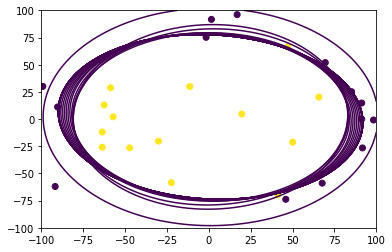

In [42]:
for dat in f1Xs:
    xplot, cplot = xtoAandCorB(dat)
    plot_ellipse1(xplot, cplot)
plot_scatter(ZxNoise, ZyNoise, isInEllipse)

### gradient descent f2 with backtracking armijo

In [43]:
f2Xs = gradientDescent(x0b, p0b, f2, gradf2, 0, [])

Starting iteration of grad descent, 0
Starting value of function 0.0218388252907623
1e-08
Al found is: 5e-09
Norm of gradient 3435.28534172472
Starting iteration of grad descent, 1
Starting value of function 0.00294461322323844
1e-08
Al found is: 5e-09
Norm of gradient 534.833443562718
Starting iteration of grad descent, 2
Starting value of function 0.00184124949886869
1e-08
Al found is: 5e-09
Norm of gradient 258.820954863072
Starting iteration of grad descent, 3
Starting value of function 0.00159904366399795
Al found is: 1e-08
Norm of gradient 145.822588695063
Starting iteration of grad descent, 4
Starting value of function 0.00141014489282327
Al found is: 1e-08
Norm of gradient 131.963721992030
Starting iteration of grad descent, 5
Starting value of function 0.00124633316576592
Al found is: 1e-08
Norm of gradient 122.523849045359
Starting iteration of grad descent, 6
Starting value of function 0.00110229728581871
Al found is: 1e-08
Norm of gradient 114.724253916212
Starting iteratio

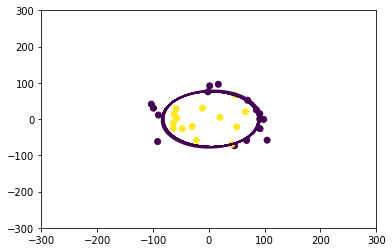

In [44]:
for dat in f2Xs:
    xplot, cplot = xtoAandCorB(dat)
    plot_ellipse2(xplot, cplot, xlim= 300, ylim=300)
plot_scatter(ZxNoise, ZyNoise, isInEllipse, xlim= 300, ylim = 300)

### Creating directional functions

In [39]:
def alf1(X, AL, P, Za, Zb):
    return f1(X+AL*P, Za, Zb)

def alf1grad(X, AL, P, Za, Zb):
    return gradf1(X+AL*P, Za, Zb).T@P

def alf2(X, AL, P, Za, Zb):
    return f2(X+AL*P, Za, Zb)

def alf2grad(X, AL, P, Za, Zb):
    return gradf2(X+AL*P, Za, Zb).T@P

### Linesearch with zoom (strong wolfe conditions)

In [40]:
def zoom(alo, ahi, thet0, derThet0,  Fun, FunDer, amax, xk, pk, Za, Zb, c1, c2):
    repeating = True
    while repeating:
        aj = (alo + ahi)/2
        thetAj = Fun(xk, aj, pk, Za, Zb)
        
        if(aj < 1e-20):
            return aj, True
        
        if thetAj > thet0 + c1*aj*derThet0 or thetAj >= Fun(xk, alo, pk, Za, Zb):
            ahi = aj 
        else:
            derThetAj = FunDer(xk, aj, pk, Za, Zb)[0]
            if np.abs(derThetAj) <= -c2*derThet0:
                astar = aj
                return astar, False
            if derThetAj*(ahi - alo)>= 0:
                ahi = alo
            alo = aj


In [41]:
def linesearch(Fun, FunDer, amax, xk, pk, Za, Zb, c1, c2):
    ai = [0, 1e-20]
    i=1
    repeat = True  
    thet0 = Fun(xk, 0, pk, Za, Zb)
    derThet0 = FunDer(xk, 0, pk, Za, Zb)[0]
    while repeat:
        thetAi = Fun(xk, ai[i], pk, Za, Zb)
        if thetAi > thet0 + c1*ai[i]*derThet0:
            astar, flag = zoom(ai[i-1], ai[i], thet0, derThet0, Fun, FunDer, amax, xk, pk, Za, Zb, c1, c2)
            return astar, flag
        derThetAi = FunDer(xk, ai[i], pk, Za, Zb)[0]
        if np.abs(derThetAi) <= - c2 * derThet0:
            astar = ai[i]
            print("test")
            return astar, False
        if derThetAi >= 0:
            astar, flag = zoom(ai[i], ai[i-1], thet0, derThet0, Fun, FunDer, amax, xk, pk, Za, Zb, c1, c2)
            return astar, flag
        ai.append((ai[i]+amax)/2)
        i += 1
        if(np.abs(ai[i]-ai[i-1])<1e-20):
            return ai[i], True
                
        

### Gradient descent with linesearch f1

In [42]:
def gradientDescentLineF1(xk, pk, fun, gradFun, niter, pnts, Za, Zb, AL, c1, c2):
    print("Gradient descet line", niter)
    pnts.append(xk)
    print("Al old is", AL)
    AL, flag = linesearch(alf1, alf1grad, 1e-4, xk, pk, Za, Zb, c1, c2)
    
    if flag:
        return pnts
    
    if (AL < 1e-20):
        return pnts
    
    print("Norm of gradient", columnNorm(pk))
    if columnNorm(pk) < gradTol:
        return pnts
    
    
    print("Al new is", AL)
    xnext = xk - AL*gradFun(xk, Za, Zb)
    if niter < 50:
        print("iter", niter)
        return gradientDescentLineF1(xnext, -gradFun(xnext, Za, Zb), fun, gradFun, niter+1, pnts, Za, Zb, AL, c1, c2)
    return pnts
    

In [43]:
x0a = np.array([1e-2,0,1e-2,0,0]).reshape(5,1) # starting ellipse is defined here
p0a = -gradf1(x0a, Za, Zb) 

x0b = np.array([0.5,0,1,1,2]).reshape(5,1)
x0b, GAM = f1Xtof2X(x0a)
p0b = -gradf2(x0b, Za, Zb)

In [50]:
f1Xs = gradientDescentLineF1(x0a, p0a, f1, gradf1, 0, [], Za, Zb, 1e-4, c1, c2)

Gradient descet line 0
Al old is 0.0001
Norm of gradient 3309207.03597155
Al new is 3.4332275390724997e-09
iter 0
Gradient descet line 1
Al old is 3.4332275390724997e-09
Norm of gradient 635783.826591359
Al new is 4.1961669921975e-09
iter 1
Gradient descet line 2
Al old is 4.1961669921975e-09
Norm of gradient 273776.239552516
Al new is 6.10351562501e-09
iter 2
Gradient descet line 3
Al old is 6.10351562501e-09
Norm of gradient 202385.997437211
Al new is 4.57763671876e-09
iter 3
Gradient descet line 4
Al old is 4.57763671876e-09
Norm of gradient 59636.5485121987
Al new is 3.05175781251e-09
iter 4
Gradient descet line 5
Al old is 3.05175781251e-09
Norm of gradient 25288.8692800368
Al new is 8.392333984385e-09
iter 5
Gradient descet line 6
Al old is 8.392333984385e-09
Norm of gradient 6314.08393471479
Al new is 3.05175781251e-09
iter 6
Gradient descet line 7
Al old is 3.05175781251e-09
Norm of gradient 1560.03862180713
Al new is 6.10351562501e-09
iter 7
Gradient descet line 8
Al old is 6.

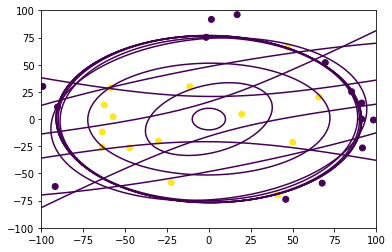

In [51]:
for dat in f1Xs:
    xplot, cplot = xtoAandCorB(dat)
    plot_ellipse1(xplot, cplot)
plot_scatter(ZxNoise, ZyNoise, isInEllipse)

### Gradient descent with linesearch f2


In [66]:
def gradientDescentLineF2(xk, pk, fun, gradFun, niter, pnts, Za, Zb, AL, c1, c2):
    print("Gradient descet line", niter)
    pnts.append(xk)
    print("Al old is", AL)
    AL, flag = linesearch(alf2, alf2grad, 1e-4, xk, pk, Za, Zb, c1, c2)
    
    if (flag or AL < 1e-20):
        return pnts
    
    print("Norm of gradient", columnNorm(pk))
    if columnNorm(pk) < gradTol:
        return pnts
    
    
    print("Al new is", AL)
    xnext = xk - AL*gradFun(xk, Za, Zb)
    if niter < 50:
        print("iter", niter)
        return gradientDescentLineF2(xnext, -gradFun(xnext, Za, Zb), fun, gradFun, niter+1, pnts, Za, Zb, AL, c1, c2)
    return pnts
    

In [67]:
f2Xs = gradientDescentLineF2(x0b, p0b, f2, gradf2, 0, [], Za, Zb, 1e-4, c1, c2)

Gradient descet line 0
Al old is 0.0001
Norm of gradient 3482.86308484438
Al new is 6.10351562501e-09
iter 0
Gradient descet line 1
Al old is 6.10351562501e-09
Norm of gradient 540.734640457483
Al new is 9.15527343751e-09
iter 1
Gradient descet line 2
Al old is 9.15527343751e-09
Norm of gradient 177.397277476125
Al new is 2.441406250001e-08
iter 2
Gradient descet line 3
Al old is 2.441406250001e-08
Norm of gradient 268.421830701144
Al new is 9.15527343751e-09
iter 3
Gradient descet line 4
Al old is 9.15527343751e-09
Norm of gradient 144.108086334451
Al new is 2.1362304687510002e-08
iter 4
Gradient descet line 5
Al old is 2.1362304687510002e-08
Norm of gradient 193.025905991361
Al new is 8.392333984385e-09
iter 5
Gradient descet line 6
Al old is 8.392333984385e-09
Norm of gradient 95.7700013761166
Al new is 1.525878906251e-08
iter 6
Gradient descet line 7
Al old is 1.525878906251e-08
Norm of gradient 36.2837029723713
Al new is 6.10351562501e-09
iter 7
Gradient descet line 8
Al old is 6.

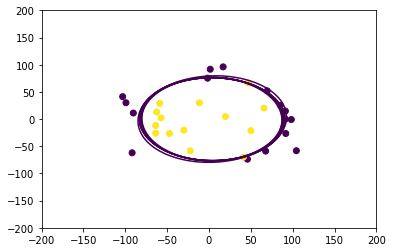

In [68]:
for dat in f2Xs:
    xplot, cplot = xtoAandCorB(dat)
    plot_ellipse2(xplot, cplot, xlim = 200, ylim = 200)
plot_scatter(ZxNoise, ZyNoise, isInEllipse, xlim = 200, ylim = 200)

### BFGS with linesearch f1


In [44]:
def bfgs(X, gradFunc, Func, FuncDir, GradFuncDir):
    xk = X.reshape(5,1)
    hk = np.identity(5)
    identity = np.identity(5)
    
    
    pointList =[]
    gradList = []
    hessList = []
    valueList = []
    
    counter = 0
    repeat = True
    while repeat:
        funcvalue = Func(xk, Za, Zb)
        print("This is the function value at the start of a bfgs iteration", funcvalue)
        if funcvalue <= funcTol:
            return pointList, valueList


        valueList.append(funcvalue)
        grad = gradFunc(xk, Za, Zb)

        print("grad before in bfsg", grad)
        #print("xk before appending to pointlist", xk)
        pointList += [xk]
        gradList += [grad]
        hessList += [hk]
        pk = (-hk@grad).reshape(5,1)
        print("This is pk found in BFGS linesearch", pk)
        #print("This is xk before linesearch", xk)
        alfa, flag = linesearch(FuncDir, GradFuncDir, 1e-4, xk, pk, Za, Zb, c1, c2)
        print("alfa bfgs", alfa)
        #print("alfa*pk",alfa*pk)
        
        #if (flag or alfa < 1e-20):
            #return pointList
    
        
        xk = (xk + alfa*pk).reshape(5,1)
        print("xk bfgs", xk)

        #xk = projection(xk, lower, upper)
        #print("this is pointlist", pointList)
        sk = ((xk - pointList[counter]).reshape(5,1))

        #print("sk", sk)
        #print("xkproj", xk)
        yk =  (gradFunc(xk, Za, Zb).reshape(5,1) - gradList[counter])
        
        #print("yk", (yk.T.astype(float)@sk.astype(float))[0])
        rhok = (1/(yk.T@sk)[0])

        #print("rhok", rhok)
        hk = (identity - rhok*(sk@yk.T))@hk@(identity - rhok*(sk@yk.T)) + rhok*(sk@sk.T)
        #print("print hk is", hk)
        
        counter += 1
        
        print("Norm of gradient", columnNorm(pk))
        if columnNorm(pk) < gradTol:
            return pointList, valueList


        #if counter > 4 and np.abs(valueList[counter-2]/valueList[counter-1]) > 0.99:
            #print("Decrease slowing in bfgs")
            #return pointList

        if(counter == 100):
            return pointList, valueList


In [45]:
f1Xs, valueList1 = bfgs(x0a, gradf1, f1, alf1, alf1grad)


This is the function value at the start of a bfgs iteration 22021.2245338090
grad before in bfsg Matrix([[2753955.67415717], [552992.893250209], [1749507.97783742], [188.686814956917], [107.686784934858]])
This is pk found in BFGS linesearch Matrix([[-2753955.67415717], [-552992.893250209], [-1749507.97783742], [-188.686814956917], [-107.686784934858]])
alfa bfgs 3.4332275390724997e-09
xk bfgs Matrix([[0.000545043538098646], [-0.00189855043001800], [0.00399354103066152], [-6.47804769369963e-7], [-3.69713235632532e-7]])
Norm of gradient 3309207.03597155
This is the function value at the start of a bfgs iteration 1223.09035325554
grad before in bfsg Matrix([[180872.994246658], [-458187.867052854], [401957.598916565], [-14.7185497425362], [32.3967589694298]])
This is pk found in BFGS linesearch Matrix([[-31170.1994135747], [488248.111819765], [-306855.765461968], [24.9754118308659], [-26.5429927586606]])
alfa bfgs 4.57763671876e-09
xk bfgs Matrix([[0.000402357688731995], [0.00033647205451

grad before in bfsg Matrix([[796.765810429177], [7991.00438135049], [-73.7208408139668], [0.0147061694679167], [0.00490157420236913]])
This is pk found in BFGS linesearch Matrix([[43020.0030809100], [13250.2881401649], [-172.042017987951], [-1636586121.69216], [-879703689.341428]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000150880924048776], [5.69707327126912e-5], [0.000185190535238039], [8.56642921081970], [4.62969514832819]])
Norm of gradient 1858034638.20851
This is the function value at the start of a bfgs iteration 0.142966219111294
grad before in bfsg Matrix([[796.765810485781], [7991.00438134980], [-73.7208407978785], [0.0147061694678230], [0.00490157420236589]])
This is pk found in BFGS linesearch Matrix([[1797.71847306698], [4525.16042265593], [-8748.89307920348], [-441154815.262913], [-239258270.251511]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000150880924048785], [5.69707327127138e-5], [0.000185190535237995], [8.56642921081750], [4.62969514832699]])
Norm of gradient 501858636.484072


alfa bfgs 5e-21
xk bfgs Matrix([[0.000150880924050364], [5.69707327133205e-5], [0.000185190535237699], [8.56642921074503], [4.62969514828829]])
Norm of gradient 421955102.253517
This is the function value at the start of a bfgs iteration 0.142966219116319
grad before in bfsg Matrix([[796.765810874049], [7991.00438137920], [-73.7208407268597], [0.0147061694671688], [0.00490157420228344]])
This is pk found in BFGS linesearch Matrix([[44164.2961736143], [12965.8026916437], [-788.943361006525], [-1700172485.30929], [-899354939.815423]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000150880924050585], [5.69707327133853e-5], [0.000185190535237695], [8.56642921073653], [4.62969514828380]])
Norm of gradient 1923389141.51359
This is the function value at the start of a bfgs iteration 0.142966219116867
grad before in bfsg Matrix([[796.765810932187], [7991.00438137755], [-73.7208407107569], [0.0147061694670707], [0.00490157420228004]])
This is pk found in BFGS linesearch Matrix([[1459.45758050692], [3763.

Norm of gradient 2059482103.63795
This is the function value at the start of a bfgs iteration 0.142966219121372
grad before in bfsg Matrix([[796.765811340581], [7991.00438138431], [-73.7208406242198], [0.0147061694663656], [0.00490157420221482]])
This is pk found in BFGS linesearch Matrix([[941.736425930874], [2480.15262944699], [-4551.80754474152], [-228961196.918619], [-125675743.942139]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000150880924052212], [5.69707327139533e-5], [0.000185190535237420], [8.56642921066334], [4.62969514824510]])
Norm of gradient 261185034.673838
This is the function value at the start of a bfgs iteration 0.142966219121456
grad before in bfsg Matrix([[796.765811339690], [7991.00438138705], [-73.7208406271370], [0.0147061694663670], [0.00490157420221067]])
This is pk found in BFGS linesearch Matrix([[46434.2317773163], [12536.0863399913], [-1871.91581288576], [-1864828577.08445], [-970873103.817074]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000150880924052444], [5.6970732

grad before in bfsg Matrix([[796.765811780365], [7991.00438136603], [-73.7208405227589], [0.0147061694655691], [0.00490157420214681]])
This is pk found in BFGS linesearch Matrix([[49955.5178241581], [11996.1170507724], [-3399.52441286932], [-2155440516.66755], [-1096805309.99193]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000150880924054162], [5.69707327144963e-5], [0.000185190535237228], [8.56642921057889], [4.62969514820118]])
Norm of gradient 2418451097.61797
This is the function value at the start of a bfgs iteration 0.142966219125906
grad before in bfsg Matrix([[796.765811846491], [7991.00438135975], [-73.7208405060521], [0.0147061694654447], [0.00490157420213752]])
This is pk found in BFGS linesearch Matrix([[53.3496077182714], [143.642021758171], [-252.221501541715], [-12255347.8539857], [-6959762.70076989]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000150880924054162], [5.69707327144970e-5], [0.000185190535237227], [8.56642921057883], [4.62969514820115]])
Norm of gradient 14093681.1358961


alfa bfgs 1.430511474709375e-10
xk bfgs Matrix([[0.000137715687128591], [3.65274724420167e-5], [0.000210871381233327], [8.63101355084156], [4.90630485113395]])
Norm of gradient 1073711279.08825
This is the function value at the start of a bfgs iteration 0.0792227682120500
grad before in bfsg Matrix([[330.100552356636], [2355.46253088008], [3966.33204196602], [0.00567974544321453], [0.00888109189045389]])
This is pk found in BFGS linesearch Matrix([[-15946.0809829862], [-1442.70542042661], [-486.018361039738], [1107096985.68364], [555113305.953352]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000137715687128511], [3.65274724420095e-5], [0.000210871381233325], [8.63101355084710], [4.90630485113673]])
Norm of gradient 1238472655.49662
This is the function value at the start of a bfgs iteration 0.0792227682120532
grad before in bfsg Matrix([[330.100552335382], [2355.46253088264], [3966.33204196221], [0.00567974544326699], [0.00888109189046203]])
This is pk found in BFGS linesearch Matrix([[-7241.6

alfa bfgs 5e-21
xk bfgs Matrix([[0.000134937978737770], [3.67885555160166e-5], [0.000209775352136065], [8.75350526173006], [4.97402991704678]])
Norm of gradient 2159713885.15226
This is the function value at the start of a bfgs iteration 0.0773492906993587
grad before in bfsg Matrix([[-593.171785909099], [2462.25930368059], [3649.68992428386], [0.00792972177185184], [0.00886580449722080]])
This is pk found in BFGS linesearch Matrix([[-1007.78050377969], [-3240.46366852449], [3026.61798578188], [-249396785.571198], [-87666190.2539246]])
alfa bfgs 5e-21
xk bfgs Matrix([[0.000134937978737765], [3.67885555160004e-5], [0.000209775352136081], [8.75350526172881], [4.97402991704634]])
Norm of gradient 264356043.221183
This is the function value at the start of a bfgs iteration 0.0773492906993631
grad before in bfsg Matrix([[-593.171785909636], [2462.25930367618], [3649.68992428627], [0.00792972177184207], [0.00886580449721853]])
This is pk found in BFGS linesearch Matrix([[-3328.43667164304], 

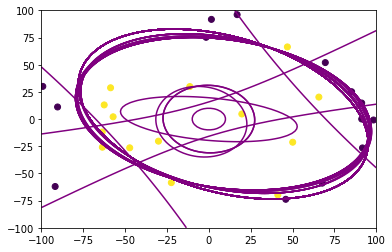

In [46]:
for dat in f1Xs:
    xplot, cplot = xtoAandCorB(dat)
    plot_ellipse1(xplot, cplot)
plot_scatter(ZxNoise, ZyNoise, isInEllipse)

In [111]:
### BFGS on f2

In [53]:
f2Xs, valueList2 = bfgs(x0b, gradf2, f2, alf2, alf2grad)

This is the function value at the start of a bfgs iteration 0.0222621803339267
grad before in bfsg Matrix([[-2559.13510368045], [-1756.46209971776], [-1579.35068191693], [30.9876902741679], [26.3603436486229]])
This is pk found in BFGS linesearch Matrix([[2559.13510368045], [1756.46209971776], [1579.35068191693], [-30.9876902741679], [-26.3603436486229]])
alfa bfgs 6.10351562501e-09
xk bfgs Matrix([[0.000143130086267625], [3.99151396194014e-6], [0.000168205349285952], [0.000995356372989846], [-4.48130802207745e-5]])
Norm of gradient 3482.86308484438
This is the function value at the start of a bfgs iteration 0.00334102576778815


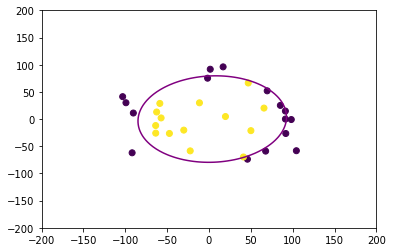

In [54]:
for dat in f2Xs:
    xplot, cplot = xtoAandCorB(dat)
    plot_ellipse2(xplot, cplot, xlim = 200, ylim = 200)
plot_scatter(ZxNoise, ZyNoise, isInEllipse, xlim = 200, ylim = 200)

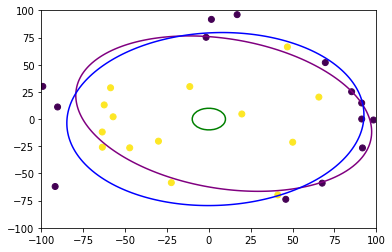

In [55]:
Aplot, cplot =  xtoAandCorB(f1Xs[len(f1Xs)-1])
Aplot2, cplot2 =  xtoAandCorB(f2Xs[len(f2Xs)-1])
plot_ellipse1(Aplot, cplot, xlim=100, ylim=100, resolution = 100)
plot_ellipse2(Aplot2, cplot2, xlim=100, ylim=100, resolution = 100, c='blue')
Aplotorig, cplotorig =  xtoAandCorB(x0a)
plot_ellipse1(Aplotorig, cplotorig, xlim=100, ylim=100, resolution = 100, c='green')

plot_scatter(ZxNoise, ZyNoise, isInEllipse)



In [56]:
def linePlot(listOfPointsf1, listOfPointsf2, ylabel, title, logscale):
    #Makes a line 
    plt.plot(listOfPointsf1, label = "f1")
    plt.plot(listOfPointsf2, label = "f2")
    plt.xlabel('Iteration')
    plt.ylabel(ylabel)
    plt.title(title)
    if(logscale):
        plt.yscale('log')
    plt.legend()
    plt.show()
    

In [57]:
def changeInXNorm(xlist):
    xnextToLast = xlist[-2]
    
    for i in range(len(xlist)-1):
        xlist[i] = columnNorm((xlist[i+1]-xlist[i]))
    
    xlist[-1] = columnNorm((xlist[-1]-xnextToLast))
    return xlist

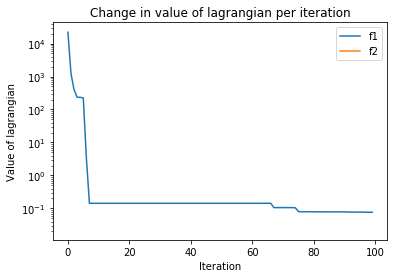

In [52]:
linePlot(valueList1, valueList2, "Value of lagrangian", "Change in value of lagrangian per iteration", True)